In [71]:
# Import all packages

import pandas as pd
import numpy as np
from scipy import stats
import missingno as msno
import matplotlib.pyplot as plt
import seaborn
from sklearn.decomposition import PCA


# Import the csv into a pandas data frame 
churn_data = pd.read_csv("C:/Users/jacooke2/WGU/D206/churn_raw_data.csv")




In [72]:
# Use the .head() function to get an overview of what is in data set
churn_data.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


## Detecting Duplicates

The .duplicated() method detects duplicates  
**THIS IS FOR TREATMENT PHASE** The .drop_duplicates method drops complete duplicates 

Lecture Video  
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6eedfad4-240e-4c5c-8eab-b058003d3e6b  
churn_data.info()  
The .duplicated() method detects duplicates  
churn_data.drop_duplicates()  
churn_data.duplicated().value_counts()  


In [73]:
# Use .info() to get list of columns as well as how many non-null variables are in each column 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [74]:
# using the duplicated function with sum will return the total number of duplicates in the data frame
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6eedfad4-240e-4c5c-8eab-b058003d3e6b
churn_data.duplicated().sum()

0

In [75]:
# Using a subset in the duplicated function lets us check specified columns for duplicates. Checking customer_id shows if there are any duplicate customer accounts
duplicates = churn_data.duplicated(subset=['Customer_id'], keep=False)
churn_data[duplicates].sort_values(by=['Customer_id'])



,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


## Detect missing Values
#### Data Camp
https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=8

#### Lecture Video  
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e

In [76]:
# The .isna() method detects missing values
# chain with sum() method - .isn().sum() - returns a breakdown of missing values per column in the dataframe
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
churn_data.isna()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
## chain with sum() method - .isn().sum() - returns a breakdown of missing values per column in the dataframe
print(churn_data.isna().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [78]:
## Using the .isnull() function to detect missing values gives the same result as .isna()
churn_data.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

<Axes: >

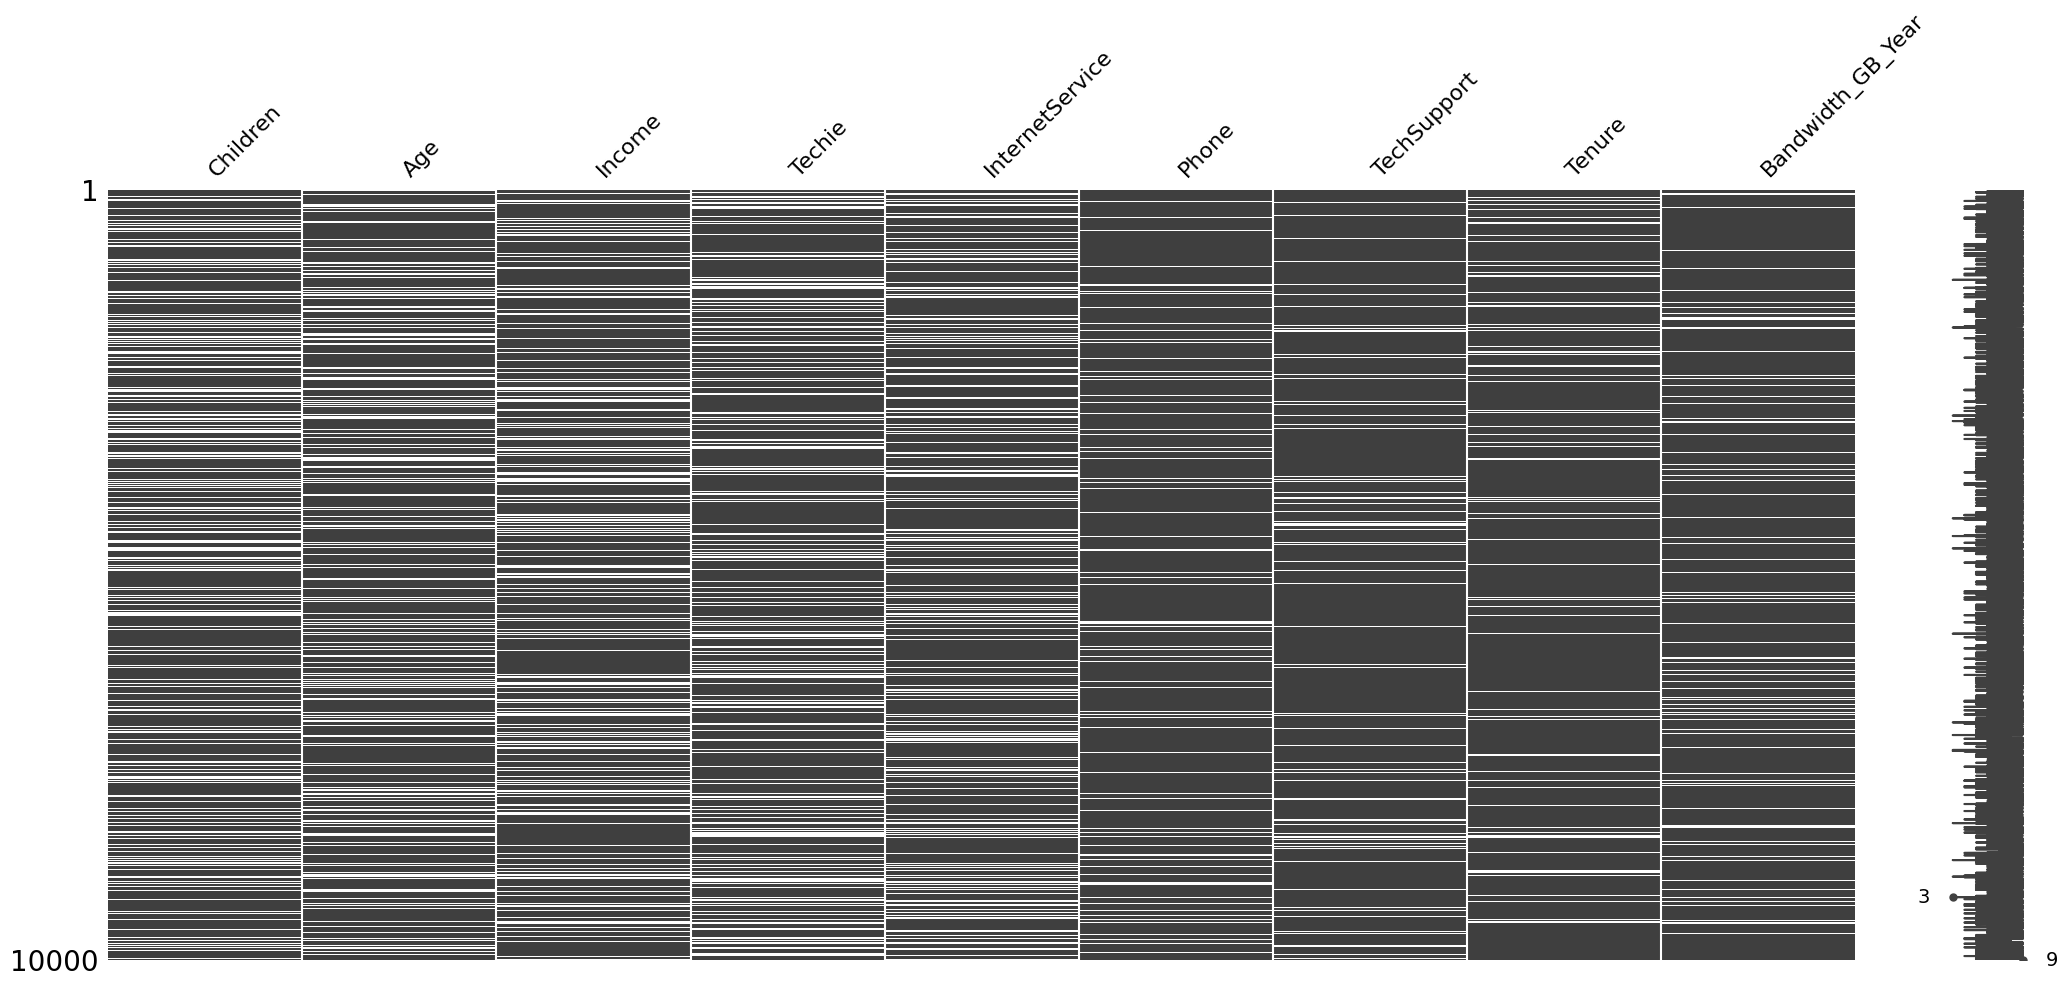

In [79]:
# Using missingno to create a visual matrix of missing values helps to see any correlation between columns and null values.
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
msno.matrix(churn_data[['Children', 'Age', 'Income', "Techie", 'InternetService', 'Phone', 'TechSupport', 'Tenure', 'Bandwidth_GB_Year']])

In [80]:
# Isolate the data frame to show only columns with null values and their totals
churn_data_null_rows = churn_data[['Age', 'Children' , 'Income', 'Techie', 'InternetService', 'Phone', 'TechSupport', 'Tenure', 'Bandwidth_GB_Year']]
churn_data_null_rows.isna().sum()

Age                  2475
Children             2495
Income               2490
Techie               2477
InternetService      2129
Phone                1026
TechSupport           991
Tenure                931
Bandwidth_GB_Year    1021
dtype: int64

(array([853., 756., 714., 739., 708., 739., 728., 728., 761., 799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

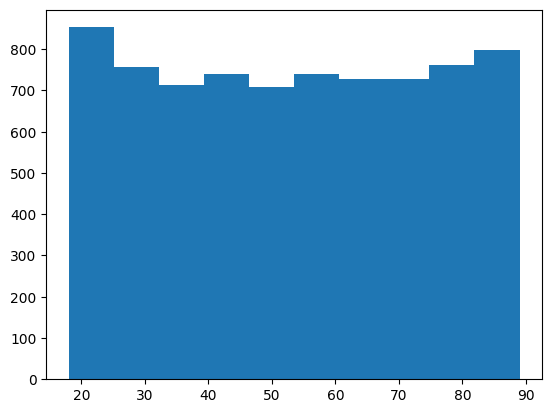

In [81]:
# check distibution of missing values to determine how to impute data (mean, median, or mode) using a histogram
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
plt.hist(churn_data['Age'])

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                        0
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

C:\Users\jacooke2\AppData\Local\Temp\ipykernel_26848\3413558351.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['Age'].fillna(churn_data['Age'].mean(), inplace=True)


(array([ 853.,  756.,  714.,  739., 3183.,  739.,  728.,  728.,  761.,
         799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

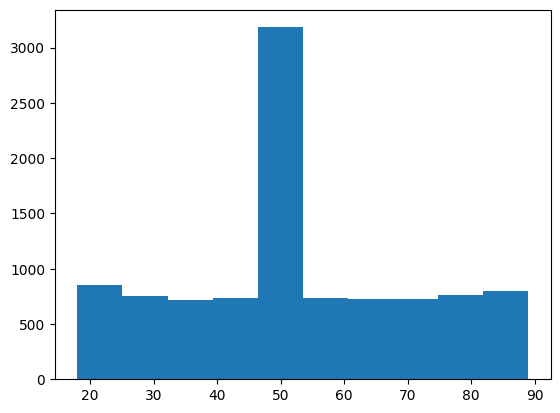

In [82]:
# Impute age with the mean, verify NA values are gone, and check the distribution
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
churn_data['Age'].fillna(churn_data['Age'].mean(), inplace=True)
print(churn_data.isnull().sum())
plt.hist(churn_data['Age'])

In [83]:
# Convert the Age variable to an integer to normalize the imputed values
churn_data['Age'] = churn_data['Age'].astype(int)


churn_data['Age']

0       68
1       27
2       50
3       48
4       83
        ..
9995    53
9996    48
9997    53
9998    39
9999    28
Name: Age, Length: 10000, dtype: int32

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

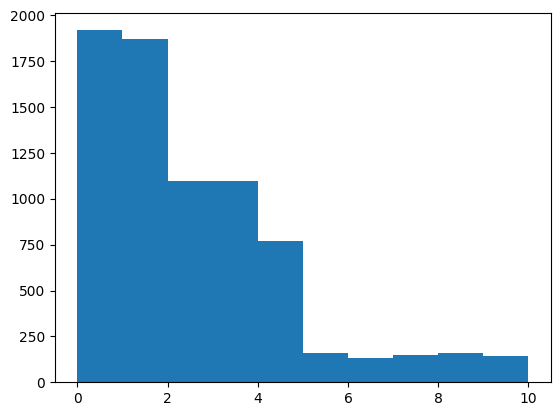

In [84]:
## Check distribution of children to determine how to handle null values
plt.hist(churn_data['Children'])

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

C:\Users\jacooke2\AppData\Local\Temp\ipykernel_26848\3740252122.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['Children'].fillna(churn_data['Children'].median(), inplace=True)


(array([1919., 4369., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

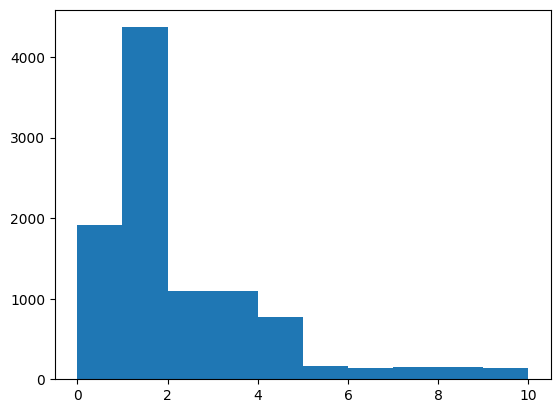

In [85]:
# Since age is a skewed right the nulls will be imputed with the median value 
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
churn_data['Children'].fillna(churn_data['Children'].median(), inplace=True)

#Then Verify there are no longer missing values
print(churn_data.isnull().sum())


plt.hist(churn_data['Children'])

(array([2.912e+03, 2.642e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

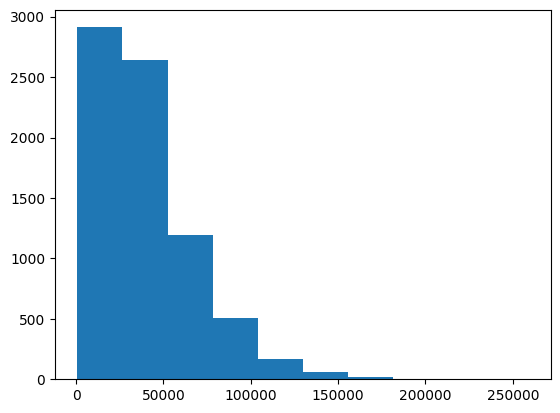

In [86]:
# Check distribution of Income to determine how to handle null values
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
plt.hist(churn_data['Income'])

In [87]:
# Since age is a skewed right the nulls will be imputed with the median value 
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
churn_data['Income'].fillna(churn_data['Income'].median(), inplace=True)

#Then Verify there are no longer missing values
churn_data.isnull().sum()

C:\Users\jacooke2\AppData\Local\Temp\ipykernel_26848\3972067030.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['Income'].fillna(churn_data['Income'].median(), inplace=True)


Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

(array([2.912e+03, 5.132e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

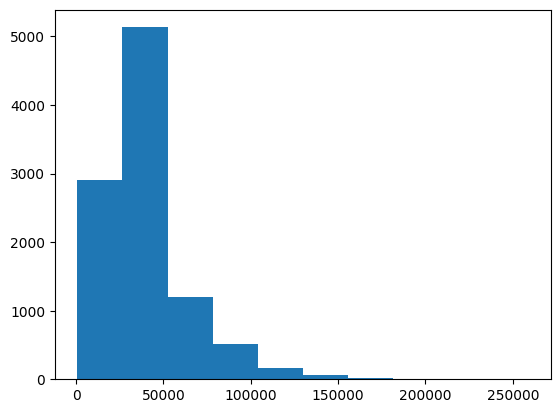

In [88]:
## Check distribution of Income to make sure proper distribution in preserved
plt.hist(churn_data['Income'])

(array([2337., 1473.,  568.,  132.,   30.,  221.,  540.,  870., 1330.,
        1568.]),
 array([ 1.00025934,  8.10016141, 15.20006347, 22.29996554, 29.3998676 ,
        36.49976967, 43.59967174, 50.6995738 , 57.79947587, 64.89937793,
        71.99928   ]),
 <BarContainer object of 10 artists>)

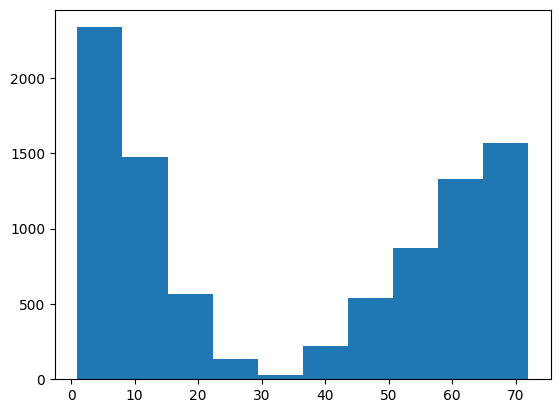

In [89]:
plt.hist(churn_data['Tenure'])

In [90]:
# Distribution for Tenure is bi-modal and will be imputed uding mode
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
churn_data['Tenure'] = churn_data['Tenure'].fillna(churn_data['Tenure'].mode()[0])

(array([2337., 1473.,  568.,  132.,   30.,  221.,  540., 1801., 1330.,
        1568.]),
 array([ 1.00025934,  8.10016141, 15.20006347, 22.29996554, 29.3998676 ,
        36.49976967, 43.59967174, 50.6995738 , 57.79947587, 64.89937793,
        71.99928   ]),
 <BarContainer object of 10 artists>)

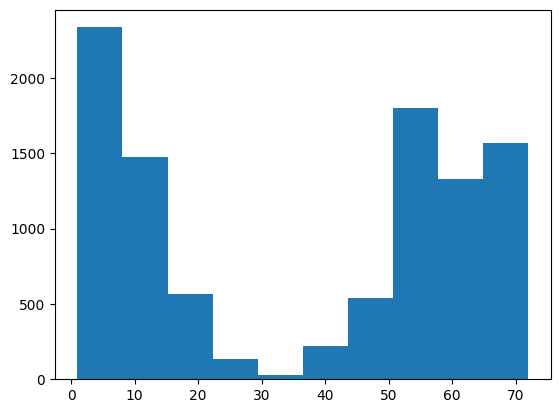

In [91]:
#Verify distribution is preserved
plt.hist(churn_data['Tenure'])

(array([1031., 2062., 1087.,  255.,   98.,  370.,  844., 1399., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

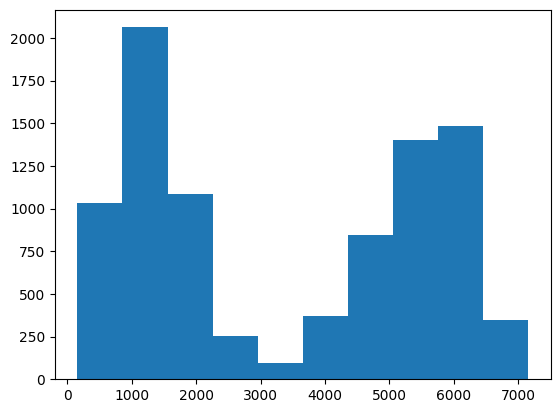

In [92]:
plt.hist(churn_data['Bandwidth_GB_Year'])

In [93]:
# Distribution for Bandwidth_GB_Year is bi-modal and will be imputed uding mode
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
churn_data['Bandwidth_GB_Year'] = churn_data['Bandwidth_GB_Year'].fillna(churn_data['Bandwidth_GB_Year'].mode()[0])

(array([1031., 2062., 1087.,  255.,   98.,  370.,  844., 2420., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

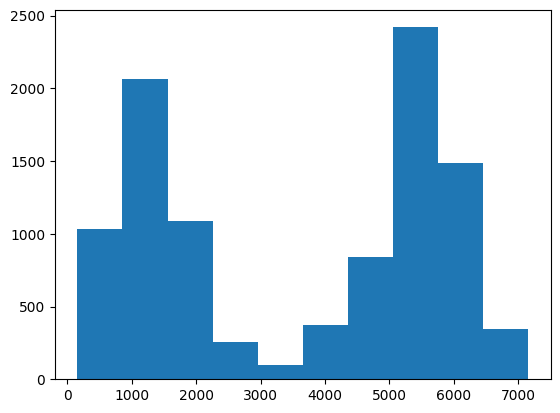

In [94]:
#verify distribution is preserved
plt.hist(churn_data['Bandwidth_GB_Year'])

In [95]:
#Then Verify there are no longer missing values
churn_data.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

## Handling Null values in Categorical data  
- Categorical values with nulls are: 'Techie', 'InternetService', 'Phone', and 'TechSupport'
- For yes/no values I will impute "no" since not confiriming could be reasonably interpretted as a no
- For all other categorical values, I will impute with mode, as recommended by https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e

In [96]:
# Examine all values for 'Techie'
churn_data['Techie'].value_counts()

Techie
No     6266
Yes    1257
Name: count, dtype: int64

In [97]:
# Interpret all null values as 'No' and impute no for all null values
churn_data['Techie'] = churn_data['Techie'].fillna('No')

#Confirm Value changes
churn_data['Techie'].value_counts()

Techie
No     8743
Yes    1257
Name: count, dtype: int64

In [98]:
# Examine all values for 'InternetService'
churn_data['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [99]:
# Use Backfill to impute Categorical data 'InternetService' as recommended in 
# https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=767749d2-ba19-4f94-bec8-b058017b2f5e
churn_data['InternetService'] = churn_data['InternetService'].fillna(churn_data['InternetService'].backfill())

# Confirm value changes
churn_data['InternetService'].value_counts()


C:\Users\jacooke2\AppData\Local\Temp\ipykernel_26848\2512842363.py:3: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  churn_data['InternetService'] = churn_data['InternetService'].fillna(churn_data['InternetService'].backfill())


InternetService
Fiber Optic    5554
DSL            4446
Name: count, dtype: int64

In [100]:
# Examine all values for 'Phone'
churn_data['Phone'].value_counts()

Phone
Yes    8128
No      846
Name: count, dtype: int64

In [101]:
# Interpret all null values as 'No' and impute no for all null values
churn_data['Phone'] = churn_data['Phone'].fillna('No')

#Confirm Value changes
churn_data['Phone'].value_counts()

Phone
Yes    8128
No     1872
Name: count, dtype: int64

In [102]:
# examine all values for 'TechSupport' 
churn_data['TechSupport'].value_counts()

TechSupport
No     5635
Yes    3374
Name: count, dtype: int64

In [103]:
# Interpret all null values as 'No' and impute no for all null values
churn_data['TechSupport'] = churn_data['TechSupport'].fillna('No')

#Confirm Value changes
churn_data['TechSupport'].value_counts()

TechSupport
No     6626
Yes    3374
Name: count, dtype: int64

In [105]:
# Check that all null values have been imputed
churn_data.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

## Detecting outliers


https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=2091371&site=eds-live&scope=site&authtype=shib&custid=ns017578&ebv=EB&ppid=pp_29  
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.  
- Using z-score  
- Using Histogram  
- Using Box Plot

Numerical Variables to be checked for outliers:  
Population  
Children  
Age  
Income  
Outage_sec_perweek  
Email  
Contacts  
Yearly_equip_failure  
Tenure  
MonthlyCharge  
Bandwidth_GB_Year  


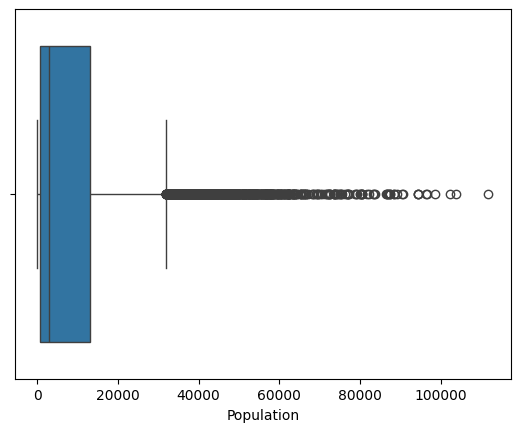

In [106]:
boxplot=seaborn.boxplot(x='Population',data=churn_data)

In [107]:
population_query = churn_data.query('Population > 53000')
population_query['Population'].sort_values()

3328     53098
8554     53111
662      53140
8217     53142
9623     53266
         ...  
6610     96575
1775     98660
6288    102433
8320    103732
8139    111850
Name: Population, Length: 219, dtype: int64

In [108]:
churn_data['population_z'] = stats.zscore(churn_data['Population'])
churn_data[['population_z','Population']].sort_values('Population')

population_z_query = churn_data.query('population_z >= 3 | population_z <= -3')
population_z_query[['population_z', 'Population']].sort_values('Population')


,population_z,Population
3328,3.003153,53098
8554,3.004054,53111
662,3.006063,53140
8217,3.006202,53142
9623,3.014794,53266
...,...,...
6610,6.015700,96575
1775,6.160170,98660
6288,6.421604,102433
8320,6.511612,103732


In [109]:
churn_data['age_z'] = stats.zscore(churn_data['Age'])
churn_data['age_z'].sort_values()

6145   -1.955694
3140   -1.955694
2246   -1.955694
8824   -1.955694
1403   -1.955694
          ...   
2372    1.988190
9884    1.988190
5268    1.988190
8591    1.988190
1026    1.988190
Name: age_z, Length: 10000, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

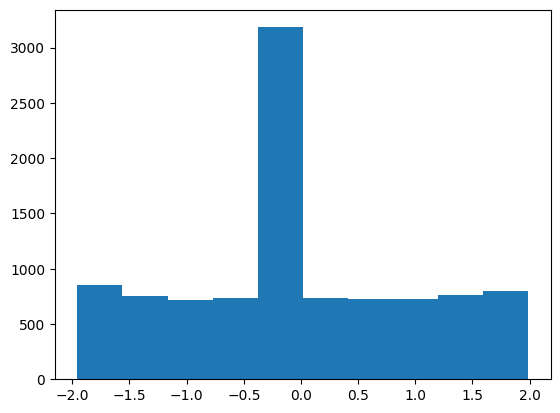

In [110]:
plt.hist(churn_data['age_z'])
plt.show

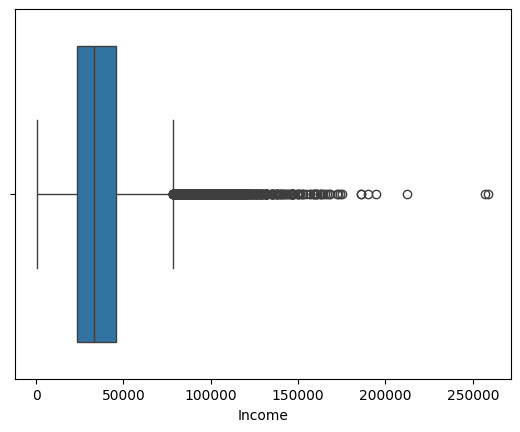

In [111]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='Income',data=churn_data)

In [112]:
# Calculate z-scores to get a more precise determination of outlier values and count of outliers
churn_data['income_z'] = stats.zscore(churn_data['Income'])
income_query = churn_data.query('income_z >= 3 or income_z <= -3')
income_query[['Income', 'income_z']].sort_values('Income')

,Income,income_z
7377,112687.70,3.007750
9726,112773.20,3.011205
7311,112803.70,3.012437
7881,112837.80,3.013815
742,112914.39,3.016910
...,...,...
3985,189938.40,6.129414
6837,194550.70,6.315795
5801,212255.30,7.031230
9180,256998.40,8.839278


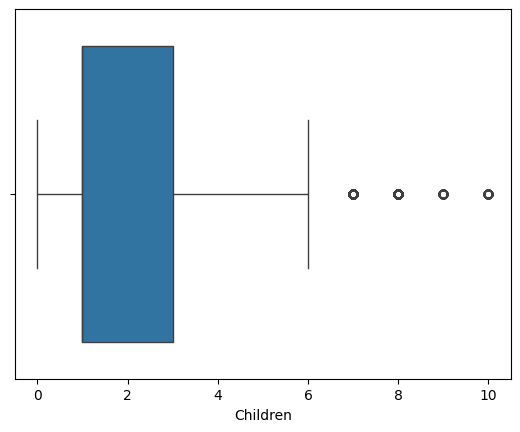

In [113]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='Children',data=churn_data)


In [114]:
children_query = churn_data.query('Children > 6')
children_query['Children'].value_counts().sum()

451

#### Before you decide on the treatment of outliers you must do the following:

1. Examine the range 
of values of 
outliers within the 
dataset to 
determine if these 
values are 
acceptable or 
outside of the 
reasonable range.
2. Determine the 
number (count) of 
outliers within your 
dataset.  
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=19c24c56-0f37-408e-bb1f-b059002a77ac

#### According to the whisker plot it looks like all income values that are outliers are > 100,000. Will look at this range to get a count of outlier vaulues. 


In [115]:
income_query = churn_data.query('Income > 100000')
income_query['Income'].sort_values()



5567    100029.10
1907    100033.86
62      100076.65
6580    100224.40
417     100232.53
          ...    
3985    189938.40
6837    194550.70
5801    212255.30
9180    256998.40
4249    258900.70
Name: Income, Length: 299, dtype: float64

#### Based on the outlier values and counts I would retain the data. The values of the data seem to be within a normal range and do not represent any errors. 
#### All values are reasonable income amounts.

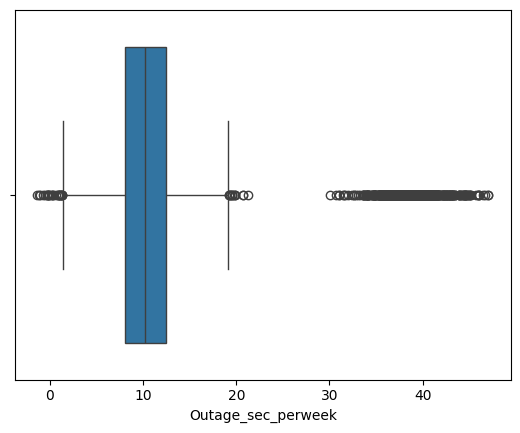

In [116]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='Outage_sec_perweek',data=churn_data)


In [117]:
# Calculate z-scores to get a more precise determination of outlier values and count of outliers
churn_data['outage_z'] = stats.zscore(churn_data['Outage_sec_perweek'])
outage_z_query = churn_data.query('outage_z >= 3 | outage_z <= -3')
outage_z_query[['Outage_sec_perweek', 'outage_z']].sort_values('outage_z')

,Outage_sec_perweek,outage_z
9836,32.581260,3.007344
7511,32.608180,3.011176
9654,32.829480,3.042675
685,33.021440,3.069998
8932,33.316610,3.112012
...,...,...
467,46.054249,4.925052
214,46.511607,4.990151
1779,46.641806,5.008683
6668,47.027660,5.063604


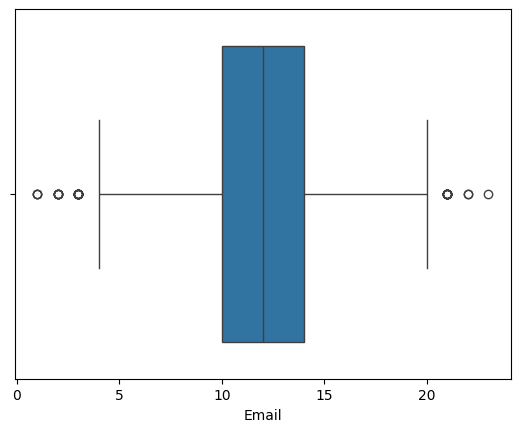

In [118]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='Email',data=churn_data)


In [119]:
email_z = churn_data.query('Email < 4 | Email > 20')
email_z['Email'].sort_values().value_counts().sum()

38

In [120]:
# Calculate z-scores to get a more precise determination of outlier values and count of outliers
churn_data['email_z'] = stats.zscore(churn_data['Email'])
email_z_query = churn_data.query('email_z >= 3 | email_z <= -3')
email_z_query['Email'].sort_values()

1381     1
6320     1
8365     1
795      2
1152     2
1399     2
7408     2
8948     2
9248     2
1746    22
9475    22
1473    23
Name: Email, dtype: int64

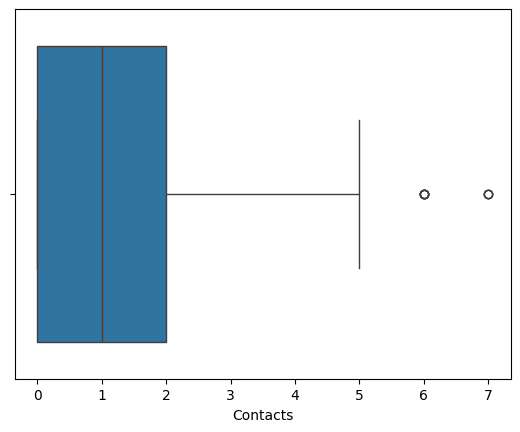

In [121]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='Contacts',data=churn_data)

In [122]:
churn_data['Contacts'].value_counts()

Contacts
0    3680
1    3675
2    1872
3     608
4     137
5      20
6       5
7       3
Name: count, dtype: int64

In [123]:
# Calculate z-scores to get a more precise determination of outlier values and count of outliers
churn_data['contacts_z'] = stats.zscore(churn_data['Contacts'])
contacts_z_query = churn_data.query('contacts_z >= 3 | contacts_z <= -3')
contacts_z_query['Contacts'].sort_values()

88      4
6356    4
6389    4
6428    4
6453    4
       ..
5840    6
426     6
7746    7
4811    7
9380    7
Name: Contacts, Length: 165, dtype: int64

In [125]:
contacts_query = churn_data.query('Contacts > 5')
contacts_query['Contacts'].count()

8

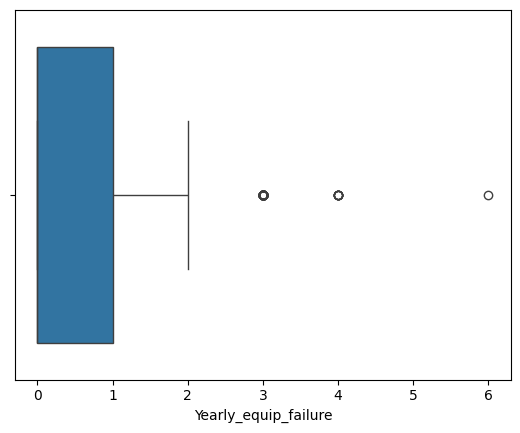

In [126]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='Yearly_equip_failure',data=churn_data)

In [127]:
failure_query = churn_data.query('Yearly_equip_failure > 2')
failure_query['Yearly_equip_failure'].value_counts()


Yearly_equip_failure
3    86
4     7
6     1
Name: count, dtype: int64

In [128]:
# Calculate z-scores to get a more precise determination of outlier values and count of outliers
churn_data['failure_z'] = stats.zscore(churn_data['Yearly_equip_failure'])
failure_z_query = churn_data.query('failure_z >= 3 | failure_z <= -3')
failure_z_query['Yearly_equip_failure'].sort_values()

8       3
7111    3
7018    3
6947    3
6586    3
       ..
9386    4
1228    4
6345    4
5166    4
5471    6
Name: Yearly_equip_failure, Length: 94, dtype: int64

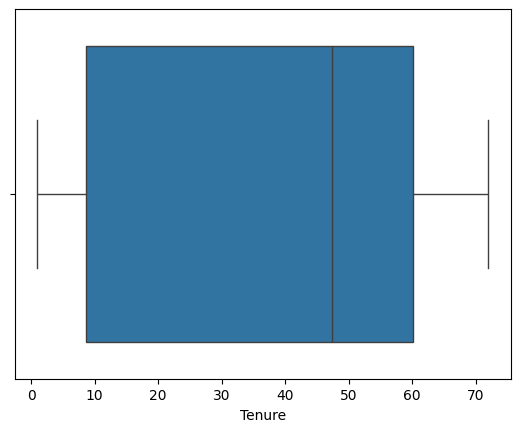

In [129]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='Tenure',data=churn_data)

In [130]:
churn_data['Tenure'].sort_values()

1951     1.000259
3887     1.005104
1063     1.018520
1676     1.019306
2537     1.025579
          ...    
7771    71.988280
8479    71.991320
8731    71.993730
8492    71.994180
9482    71.999280
Name: Tenure, Length: 10000, dtype: float64

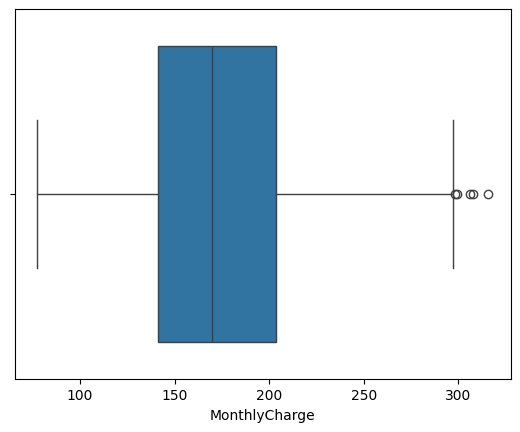

In [131]:
# Use a boxplot with seaborn to examine outliers within the variable
boxplot=seaborn.boxplot(x='MonthlyCharge',data=churn_data)

In [132]:
# Calcualte z-scores to get a more precise determination of outlier values and count of outliers
churn_data['MonthlyCharge_z'] = stats.zscore(churn_data['MonthlyCharge'])
MonthlyCharge_z_query = churn_data.query('MonthlyCharge_z >= 3 | MonthlyCharge_z <= -3')
MonthlyCharge_z_query['MonthlyCharge'].sort_values()

4700    306.268000
927     307.528124
3746    315.878600
Name: MonthlyCharge, dtype: float64

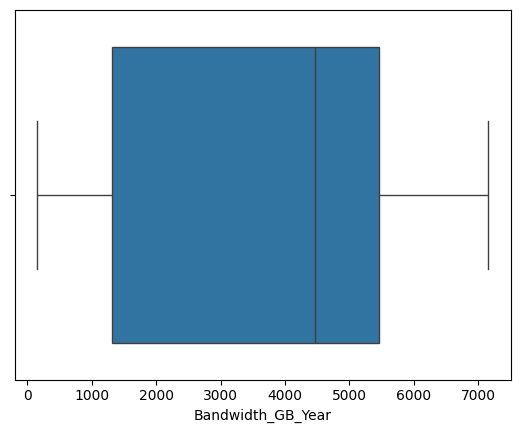

In [133]:
# Using a boxplot with seaborn to examine outliers within the GB 
boxplot=seaborn.boxplot(x='Bandwidth_GB_Year',data=churn_data)

## PCA TEST    
No missing values  
No outliers

- Population
- Income
- Outage per_week
- tenure
- monthly charge
- bandwidth per year

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3bcc452f-fa35-43be-b69f-b05901356f95



In [134]:
# create the data frame with variables used in PCA
churn = churn_data[['Population', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]



In [135]:
# Normalize the data set
churn_normalized = (churn-churn.mean())/churn.std()

# Apply the PCA
pca = PCA(n_components=churn.shape[1]) 
pca.fit(churn_normalized)

churn_pca = pd.DataFrame(pca.transform(churn_normalized)),
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [136]:
# Print the PCA dataframe
print(churn_pca)

(             0         1         2         3         4         5
0    -1.708092 -0.371346  0.130034 -0.805862 -0.402406 -0.075068
1    -1.807842  1.268194 -0.634949 -0.378470 -1.047829 -0.041231
2    -1.086594 -0.280001  0.128500 -0.461493  0.112578  0.076449
3    -1.042512 -0.466464 -0.703056 -0.242263  1.281961  0.125930
4    -2.072058 -0.540458  0.022590  0.111098  0.097419 -0.117658
...        ...       ...       ...       ...       ...       ...
9995  1.811236 -0.499835  0.957037 -0.061480 -0.007801  0.116847
9996  1.371620 -0.110625 -3.175050  3.439407 -0.889793 -0.021902
9997  0.679198 -0.765915  0.255186 -0.689582 -0.531089 -0.324604
9998  1.967242  1.142069 -1.919556  0.831113 -1.136167 -0.091584
9999  1.529903  0.757597 -0.330476  0.012323 -0.565038 -0.037936

[10000 rows x 6 columns],)


In [137]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=churn.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Population,-0.003702,-0.059135,-0.634343,0.770763,-0.004752,-0.000630
Income,0.003756,0.000470,0.770720,0.633969,-0.063705,0.001118
Outage_sec_perweek,0.024158,0.703721,0.005848,0.063284,0.707205,0.003794
Tenure,0.705300,-0.059340,0.001230,-0.000490,0.038772,-0.705355
MonthlyCharge,0.045024,0.705447,-0.059491,0.001002,-0.702823,-0.053065
Bandwidth_GB_Year,0.707045,-0.010085,-0.005055,-0.001069,-0.017771,0.706854


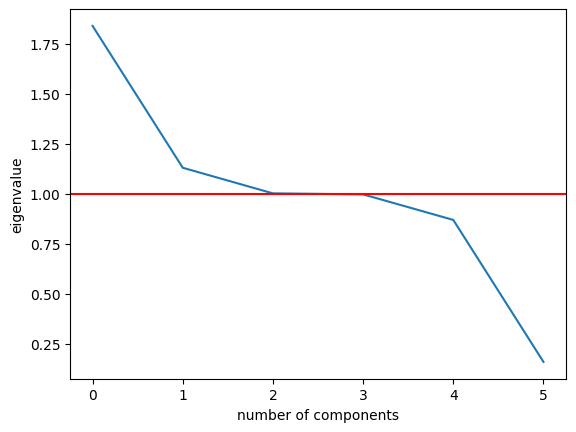

In [138]:
# Select PCs by creating a scree plot of the eigenvalues.
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / churn.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='red')
plt.show()

In [139]:
churn_data.to_csv(r'C:/Users/jacooke2/WGU/D206/D206_Jon_Cooke_PA.csv') 